In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Richardson model for asymmetric bell curve
Y=rKexp(-r(t-tm))/((1+exp(-r(t-tm)))^(1/v)(1+exp(-r(t-tm))))

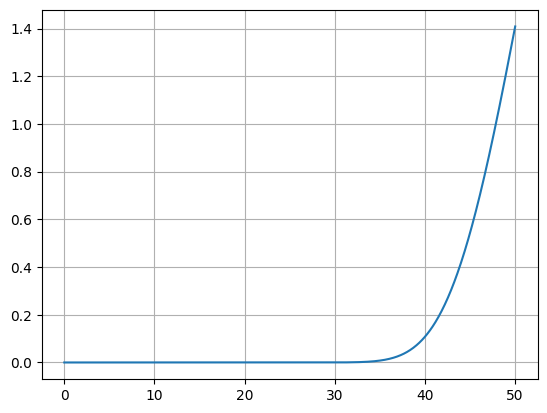

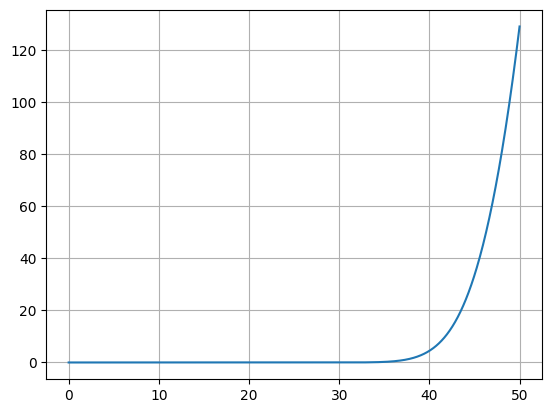

In [11]:
# Loglet example

# Richard bell curve
K = 100
r = 0.1
tm = 0.5
nu = 0.9999

t0=0
T= 50
t= np.linspace(t0,T,1000+1)
dt=t[1]-t[0]
y= r*K*np.exp(-r*(t-tm))/((1+np.exp(-r*(t-tm)))**(1/nu)*(1+np.exp(-r*(t-tm))))

def gompertz(t, K, r, c, tm=0):
    return K*r*c*np.exp(-c*(t-tm))*np.exp(-r*np.exp(-c*(t-tm)))

K = 100
r = 150
c = 0.08
tm = 0.5

y_g=gompertz(t, K, r, c, tm=0)

plt.figure()
plt.plot(t,y_g)
plt.grid(True)

# Riciard S curve
d = 0
Y_g=np.cumsum(y_g)+d
plt.figure()
plt.plot(t,Y_g)
plt.grid(True)

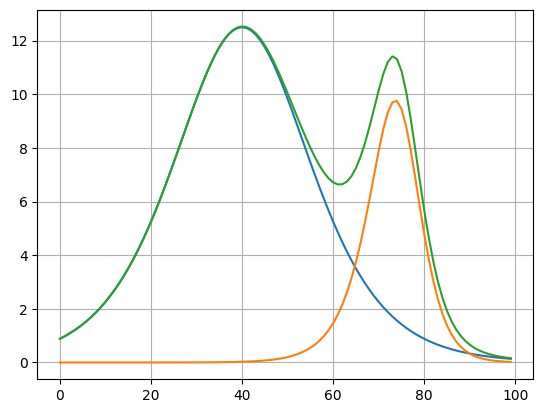

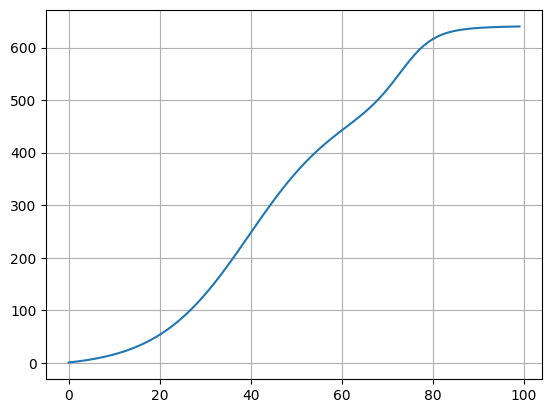

In [3]:
# Loglet sum example

# Richard bell curve
K = 500
r = 0.1
tm = 40
nu = 1

T= 100
t= np.arange(0,T)
y1= r*K*np.exp(-r*(t-tm))/((1+np.exp(-r*(t-tm)))**(1/nu)*(1+np.exp(-r*(t-tm))))

K = 100
r = 0.3
tm = 75
nu = 1.5
y2= r*K*np.exp(-r*(t-tm))/((1+np.exp(-r*(t-tm)))**(1/nu)*(1+np.exp(-r*(t-tm))))

plt.figure()
plt.plot(t,y1)
plt.plot(t,y2)
plt.plot(t,y1+y2)
plt.grid(True)

# Riciard S curve
d = 0
Y1=np.cumsum(y1)+d
Y2=np.cumsum(y2)+d
plt.figure()
plt.plot(t,Y1+Y2)
plt.grid(True)

Text(0.5, 1.0, 'Covid-19 Italy')

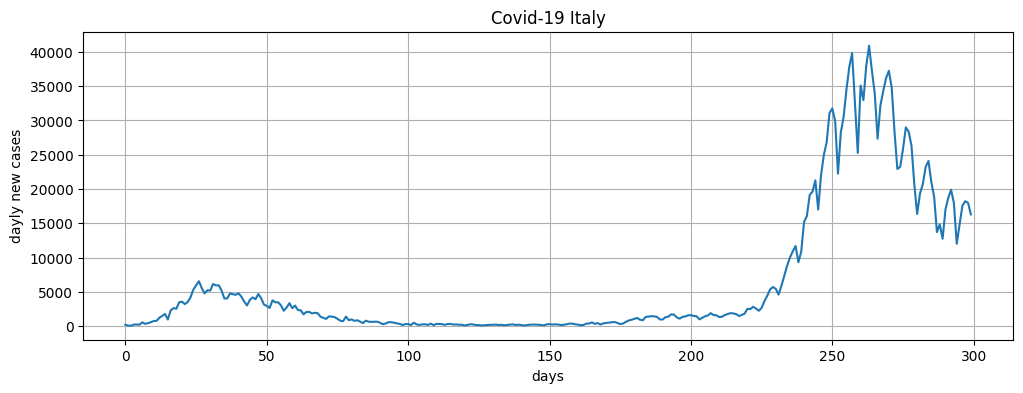

In [4]:
# Import data
national_data=pd.read_csv('..\data\dati-andamento-nazionale\dpc-covid19-ita-andamento-nazionale.csv')
new_pos=national_data['nuovi_positivi'].values

# Richard bell curve
K = 3500000
r = 0.1
tm = 1
nu = 0.05

T= 300
t= np.arange(0,T)
y= r*K*np.exp(-r*(t-tm))/((1+np.exp(-r*(t-tm)))**(1/nu)*(1+np.exp(-r*(t-tm))))

plt.figure(figsize=(12,4))
plt.plot(new_pos[0:T])
#plt.plot(y)
plt.grid(True)
plt.xlabel('days')
plt.ylabel('dayly new cases')
plt.title('Covid-19 Italy')




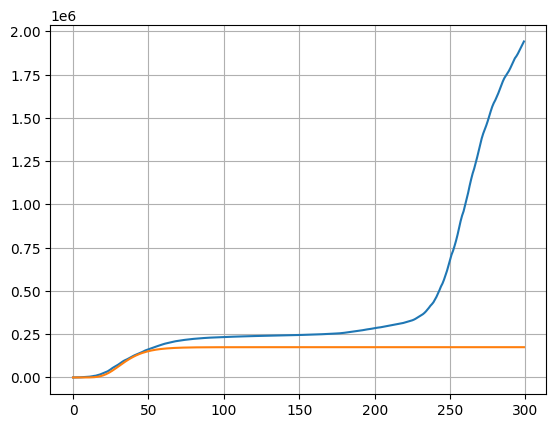

In [5]:
# Cumulative

tot_pos=np.cumsum(new_pos)
Y=np.cumsum(y)

plt.figure()
plt.plot(tot_pos[0:T])
plt.plot(Y)
plt.grid(True)

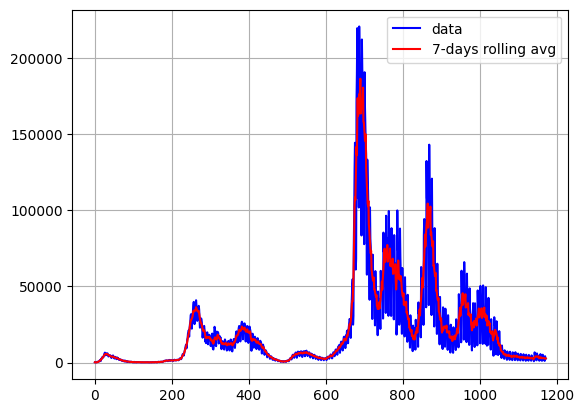

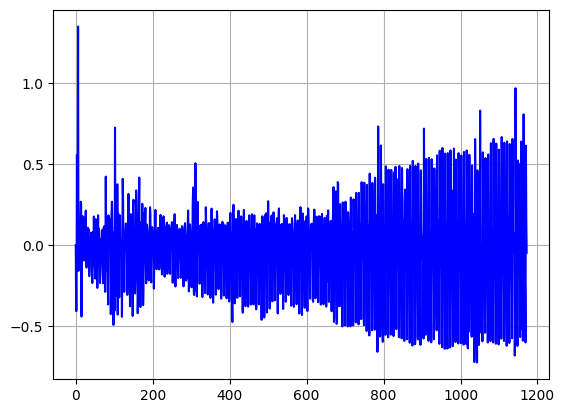

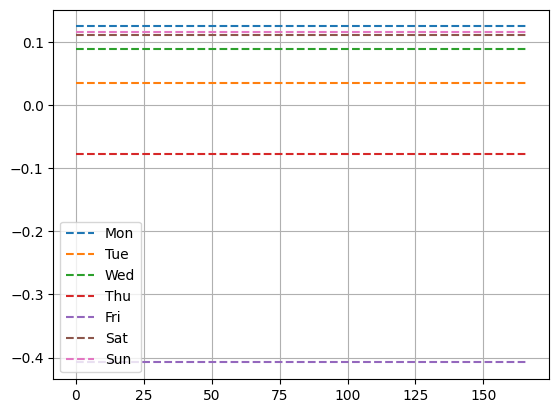

In [19]:
from lmfit import Model, Parameters

# 7-Days Rolling average and error fit
def sin_wave(t, A, T, c):
    return c + A*np.sin(2*np.pi*t/T)

def line(t, m, q):
    return m*t+q


t0=0
T=1173
tt=np.arange(t0,T)
new_pos_avg=np.empty(new_pos.shape)
for i in range(new_pos_avg.shape[0]):
    if i<7:
        new_pos_avg[i]=np.mean(new_pos[:i+1])
    else:
        new_pos_avg[i]=np.mean(new_pos[i-3:i+3])

err=(new_pos[t0:T]-new_pos_avg[t0:T])/new_pos_avg[t0:T]
res=err.shape[0]%7
n_weeks=int(err.shape[0]/7)
err=err[res-1:-1]
err=np.reshape(err,(7,n_weeks), order='F')
# Extract error of a given day

err_fit=np.zeros_like(err)
for i in range(7):
    data=err[i,:]
    fmodel = Model(line)
    ttt = np.arange(0, data.shape[0])
    params = Parameters()
    # params.add(f"A", 10, min=-2, max=2)
    # params.add(f"T", 1, min=data.shape[0]/2, max=5*data.shape[0])
    # params.add(f"c", 1, min=-1, max=1)
    params.add(f"m", 10, min=-1, max=1)
    params.add(f"q", 1, min=-1, max=1)
    result = fmodel.fit(data, params, t=ttt, max_nfev=1000)
    fit_data = line(ttt, result.params['m'].value, result.params['q'].value)
    err_fit[i]=fit_data


plt.figure()
plt.plot(tt, new_pos[t0:T], color='b', label='data')
plt.plot(tt[0:],new_pos_avg[t0:T], color='r', label='7-days rolling avg')
plt.grid(True)
plt.legend()

plt.figure()
plt.plot(tt, (new_pos[t0:T]-new_pos_avg[t0:T])/new_pos_avg[t0:T], color='b')
plt.grid(True)

colors=['yellow','orange','red','magenta','violet','blue','green']
legend=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# plt.figure()
# for i in range(new_pos.shape[0]):
#     plt.scatter(i,(new_pos[i]-new_pos_avg[i])/new_pos_avg[i], color=colors[i%7],marker='.')
# plt.grid(True)
# plt.legend(legend, loc='upper left', draggable=True)
# plt.ylabel('relative residual')
# plt.title('Differences between data and rolling average')

plt.figure()
for i in range(7):
    if i%1==0:
        # plt.plot(err[i,:],color=colors[i], label=legend[i])
        # plt.plot(err_fit[i,:],color=colors[i], label=legend[i], linestyle='--')
        plt.plot(np.mean(err[i,:])*np.ones_like(err[i,:]), label=legend[i], linestyle='--')
plt.legend()
plt.grid(True)

mean_err=np.empty(7)
for i in range(7):
    mean_err[i]=np.mean(err[i,:])

np.save('../data/dayly_errors.npy', mean_err)



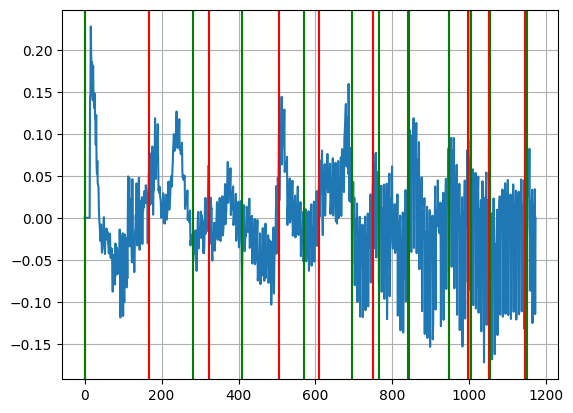

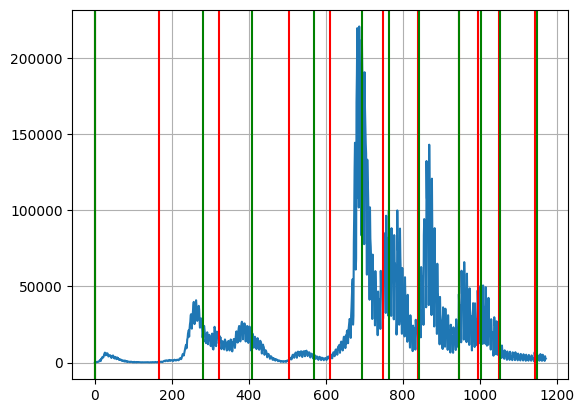

In [38]:
from lmfit import Model, Parameters
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import Forecast as fc

# Import data
national_data=pd.read_csv('..\data\dati-andamento-nazionale\dpc-covid19-ita-andamento-nazionale.csv')
new_pos=national_data['nuovi_positivi'].values
tt=np.arange(0,new_pos.shape[0])

rt = np.zeros(new_pos.shape)

for t in range(14,tt[-1]):
    rt[t] = fc.compute_rt(new_pos[0:t],window_size=14)

t_start = [0]
t_end = [0]
t=0
ended = True
started = False
while t<tt[-1]:
    if rt[t]>0.05 and ended:
        t_start.append(t)
        ended = False
        started = True
    if rt[t]<-0.05 and started and t>t_start[-1]+20:
        t_end.append(t)
        ended = True
        started = False
    t+=1

plt.figure()
plt.plot(rt)
for i in range(len(t_start)):
    plt.axvline(t_start[i], color='r')
    plt.axvline(t_end[i], color='g')
plt.grid(True)

plt.figure()
plt.plot(new_pos)
for i in range(len(t_start)):
    plt.axvline(t_start[i], color='r')
    plt.axvline(t_end[i], color='g')
plt.grid(True)

In [39]:
print(t_start)
print(t_end)

[0, 167, 322, 505, 610, 750, 841, 946, 997, 1051, 1145]
[0, 282, 409, 569, 695, 765, 842, 947, 1003, 1054, 1150]
